<a href="https://colab.research.google.com/github/lightdiffraction/sem6_nnlabs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

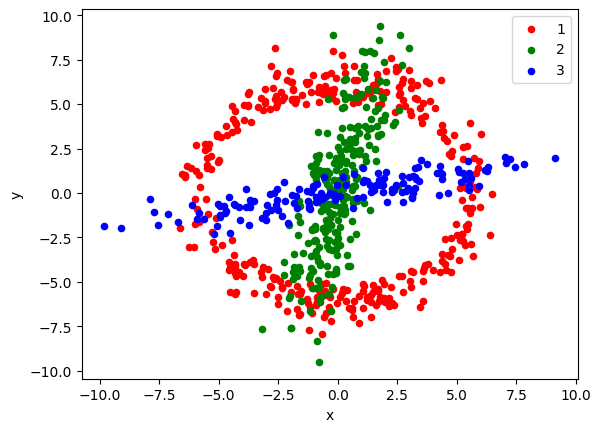

,x,y,category
0,0.658298,1.358684,-0.949622
1,-0.655753,1.642764,-0.949622
2,-1.290877,-1.024936,-0.949622
3,-0.180877,-1.396706,-0.949622
4,-0.247142,1.384065,-0.949622
...,...,...,...
745,0.797123,0.068407,1.640255
746,1.028128,-0.033093,1.640255
747,-0.018461,0.074670,1.640255
748,1.105075,0.135181,1.640255


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch
import tqdm
from sklearn.preprocessing import OneHotEncoder
import numpy as np

filename = 'data_lab3v05.csv'
df = pd.read_csv(filename, names=[ 'x', 'y', 'category'])

from sklearn.preprocessing import MinMaxScaler

normalized_df=(df-df.mean())/df.std()

df1 = df[df['category'] == 1]
df2 = df[df['category'] == 2]
df3 = df[df['category'] == 3]

ax = df1.plot(x='x', y='y', kind='scatter', c='r', label='1')
df2.plot(x='x', y='y', kind='scatter', ax=ax, c='g', label='2')
df3.plot(x='x', y='y', kind='scatter', ax=ax, c='b', label='3')
plt.show()
normalized_df

In [ ]:
train, validate, test = \
              np.split(normalized_df.sample(frac=1, random_state=42),
                       [210, 360])
X = train.iloc[:, 0:2]
y = train.iloc[:, 2:]
X_val = validate.iloc[:, 0:2]
y_val = validate.iloc[:, 2:]
X_test = test.iloc[:, 0:2]
y_test = test.iloc[:, 2:]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
print(ohe.categories_)
y = ohe.transform(y)
y_val = ohe.transform(y_val)
y_test = ohe.transform(y_test)
X, y

[array([-0.94962155,  0.34531693,  1.64025541])]


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(            x         y
 506  0.232163  0.060203
 357 -0.219896 -0.146233
 133 -0.636794  1.260306
 250 -0.165981  1.590135
 299 -0.503068  1.322173
 ..        ...       ...
 18   1.858922  0.444676
 631  0.487635 -0.000544
 140 -1.107433  1.156399
 346 -1.465267  0.801901
 507 -0.053764  0.146879
 
 [210 rows x 2 columns],
 array([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 

In [ ]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(2, 5)
        self.hidden2 = nn.Linear(5, 5)
        self.act = nn.LogSigmoid()
        self.output = nn.Linear(5, 3)

    def forward(self, x):
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.output(x)
        return x

model = Multiclass()
model

Multiclass(
  (hidden1): Linear(in_features=2, out_features=5, bias=True)
  (hidden2): Linear(in_features=5, out_features=5, bias=True)
  (act): LogSigmoid()
  (output): Linear(in_features=5, out_features=3, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.1)

In [ ]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
loss_graph = []
val_loss_graph = []
test_loss_graph = []

In [ ]:
# training parameters
n_epochs = 3000
stop_criterion = 0


for epoch in range(n_epochs):
      # take a batch
      #start = i * 750
      # forward pass
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
            # backward pass
    optimizer.zero_grad()
    loss.backward()
            # update weights
    optimizer.step()
            #присоединение функций ошибки к записям
    current_loss = loss.detach().numpy()
    loss_graph.append(current_loss)
    val_outputs = model(X_val.unsqueeze(1))
    val_loss = loss_fn(val_outputs.squeeze(), y_val)

    current_val_loss = val_loss.detach().numpy()
    if val_loss_graph:
      if current_val_loss > val_loss_graph[-1]:
        stop_criterion += 1
      else:
        stop_criterion = 0
    if stop_criterion >= 10:
      break

    val_loss_graph.append(val_loss.detach().numpy())

    test_outputs = model(X_test.unsqueeze(1))
    test_loss = loss_fn(test_outputs.squeeze(), y_test)
    test_loss_graph.append(test_loss.detach().numpy())
    print("Epoch {}: Loss = {} Stop criterion = {}".format(epoch, current_loss, stop_criterion))

Epoch 0: Loss = 1.0616627931594849 Stop criterion = 0
Epoch 1: Loss = 1.0548441410064697 Stop criterion = 0
Epoch 2: Loss = 1.049605131149292 Stop criterion = 0
Epoch 3: Loss = 1.0460840463638306 Stop criterion = 0
Epoch 4: Loss = 1.0437527894973755 Stop criterion = 0
Epoch 5: Loss = 1.0422054529190063 Stop criterion = 0
Epoch 6: Loss = 1.0411722660064697 Stop criterion = 0
Epoch 7: Loss = 1.040476679801941 Stop criterion = 0
Epoch 8: Loss = 1.0400032997131348 Stop criterion = 0
Epoch 9: Loss = 1.0396767854690552 Stop criterion = 0
Epoch 10: Loss = 1.0394476652145386 Stop criterion = 0
Epoch 11: Loss = 1.039283275604248 Stop criterion = 0
Epoch 12: Loss = 1.039162278175354 Stop criterion = 0
Epoch 13: Loss = 1.0390703678131104 Stop criterion = 0
Epoch 14: Loss = 1.0389982461929321 Stop criterion = 0
Epoch 15: Loss = 1.0389394760131836 Stop criterion = 0
Epoch 16: Loss = 1.03889000415802 Stop criterion = 0
Epoch 17: Loss = 1.0388469696044922 Stop criterion = 0
Epoch 18: Loss = 1.0388082

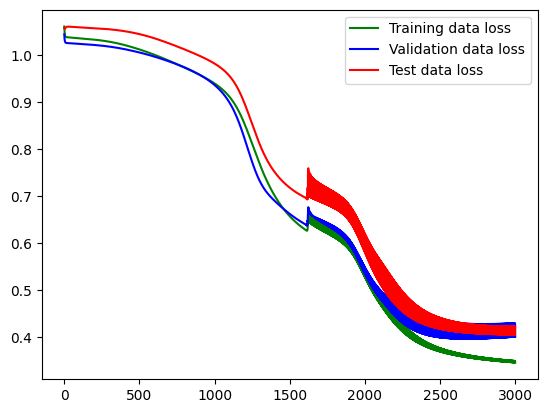

In [ ]:
plt.plot(loss_graph, 'g', label='Training data loss')
plt.plot(val_loss_graph, 'b', label='Validation data loss')
plt.plot(test_loss_graph, 'r', label='Test data loss')
plt.legend()
plt.show()

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [ ]:
X.size()

torch.Size([210, 2])

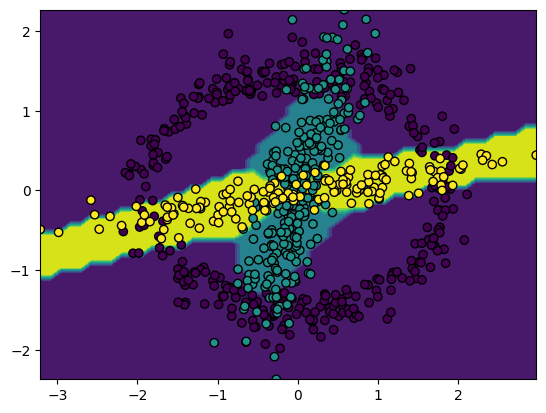

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
feature_1, feature_2 = np.meshgrid(
    np.linspace(normalized_df['x'].min(), normalized_df['x'].max(), dtype='float32'),
    np.linspace(normalized_df['y'].min(), normalized_df['y'].max(), dtype='float32')
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
pred = model(torch.tensor(grid))

y_pred = torch.argmax(model(torch.tensor(grid)), dim = 1)
y_pred = np.reshape(y_pred, feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    normalized_df['x'], normalized_df['y'], c=normalized_df['category'], edgecolor="black"
)